## Project: Linear Regression Algorithm using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading the Boston dataset

In [104]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [19]:
# Creating the dataframe
X=boston.data
Y=boston.target
df=pd.DataFrame(X,columns=boston.feature_names)
df['Target']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
df.shape

(506, 14)

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [118]:
# Dividing the dataset into training and testing data with test_size=20% 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [92]:
# See the 80:20 division ratio
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


## Building the model

Final cost: 45.468374226260266


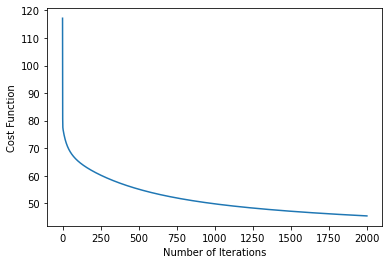

[-0.11985632  0.12132673 -0.09569736  0.02232015  0.01782121  0.4362232
  0.10802872  0.06460969  0.02318533  0.00193782  0.28232161  0.03567506
 -0.58760065  0.04184103]


In [103]:
# Passing on training dataset and calculating coefficients array
coeff=run(X_train,y_train)
# Here we are printing the minimum cost we can achieve 
# Next is the graph (Cost Function vs Number of iterations), where it should be monotonically decreasing function
print(coeff)

## Run Function

In [84]:
def run(X_train,y_train):
    columns=X_train.shape[1]
#   Here I am adding a new column, corresponding to intercept (c), where each cell have value 1
    X_train=np.insert(X_train,columns,1,axis=1)
    learning_rate=0.0000001
    num_iterations=2000
    coeff=gd(X_train,y_train,learning_rate,num_iterations)
    return coeff

## Gradient Descent Function

In [94]:
def gd(X_train,y_train,learning_rate,num_iterations):
#   Remember here our X_train ndarray has an added column consisting of ones.  
    columns=X_train.shape[1]
#   Initializing all the values of coeff to 0
    coeff=[0 for i in range(columns)]
    cost_array=[]
    for i in range(num_iterations):
        coeff=step_gradient(X_train,y_train,learning_rate,coeff)
#       Calculating cost after each iteration and storing in the cost list
        temp=cost(X_train,y_train,coeff)
        cost_array.append(temp)
    print("Final cost:",cost_array[-1])
    x=np.arange(0,2000,1)
    plt.ylabel('Cost Function')
    plt.xlabel('Number of Iterations')
    plt.plot(x,cost_array)
    plt.show()
    return coeff

## Step Gradient Function

In [95]:
def step_gradient(X_train,y_train,learning_rate,coeff):
    rows=X_train.shape[0]
    columns=X_train.shape[1]
#   Here we are calculating partial derivative of cost function w.r.t to each parameter
    step_coeff = np.zeros(columns)
    for i in range(rows):
        x=X_train[i,:]
        y=y_train[i]
        for j in range(columns):
            step_coeff[j] += (-2/rows) * (y - (coeff * x).sum()) * x[j]
        coeff = coeff-(learning_rate * step_coeff)
    return coeff

## Cost Function

In [96]:
def cost(X_train,y_train,coeff):
    Rows=X_train.shape[0]
    Columns=X_train.shape[1]
    cost=0
    for i in range(Rows):
        x=X_train[i,:]
        y=y_train[i]
        cost+=(1/Rows)*((y-(coeff*x).sum())**2)
    return cost

## Testing it with the Testing dataset

In [98]:
# Loading the test data and adding a column of 1's corresponding to intercept
columns=X_test.shape[1]
X_test=np.insert(X_test,columns,1,axis=1)

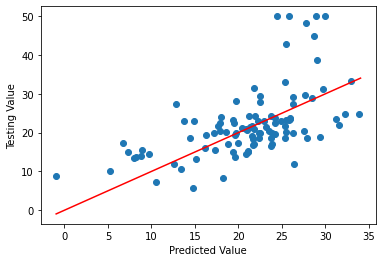

In [102]:
# Calculating the predicted Value list
y_pred=[]
for i in range(X_test.shape[0]):
    x=X_test[i,:]
    y_pred.append((coeff*x).sum())
# Plotting a scatter graph between Testing value and Predicted Value
# We also have y=x line in red to check the accuracy of our prediction: closer the points to the line better the score
plt.xlabel('Predicted Value')
plt.ylabel('Testing Value')
x=np.arange(min(y_pred),max(y_pred)+1,1)
plt.plot(x,x,'r')
plt.scatter(y_pred,y_test)
plt.show()

## Normal Form of Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(X_train,y_train)

LinearRegression()

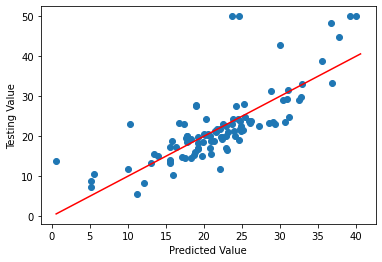

In [121]:
coef=alg1.coef_
intercept=alg1.intercept_
y_predict=alg1.predict(X_test)
plt.xlabel('Predicted Value')
plt.ylabel('Testing Value')
x=np.arange(min(y_predict),max(y_predict)+1,1)
plt.plot(x,x,'r')
plt.scatter(y_predict,y_test)
plt.show()

In [115]:
alg1.score(X_test,y_test)

0.5892223849182507

In [116]:
alg1.score(X_train,y_train)

0.7730135569264234